In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DBSCAN

## DBSCAN 개요
- DBSCAN : Density Based Spatial Clustering of Applications with Noise
- 밀도 기반의 군집화 알고리즘
    - 특정 공간 내에 데이터 밀도 차이를 기반
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능
- 복잡한 기하학적 분포도를 갖는 데이터 세트에 대해서도 군집화 가능

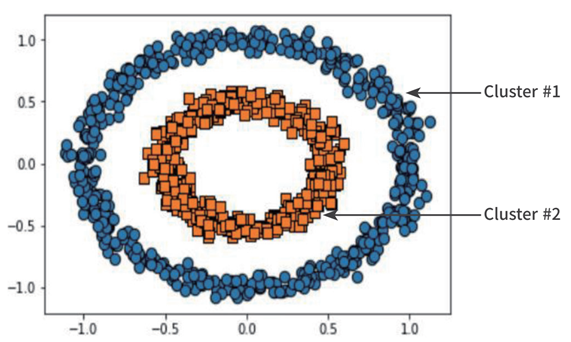

### DBSCAN을 구성하는 두 가지 파라미터
- Epsilon : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- min points : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

**데이터 포인트 구분**

: 입실론 주변 영역 내 포함되는 최소 데이터 개수를 충족시키는 기준에 따라 구분
- 핵심 포인트(core point) 
    - 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트(neighbor point)
    - 주변 영역 내에 위치한 타 데이터
- 경계 포인트(border point)
    - 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인터를 가지고 있지 않지만 핵심 포인트를 이웃 포인터로 가지고 있는 데이터
- 잡음 포인트(noise point)
    - 최소 데이터 개수 이상의 이웃 포인터를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트도 가지고 있지 않는 데이터


### DBSCAN 군집화 과정(사례)
: 최소데이터 개수는 5인 경우

1. p1~p12 까지 12개 데이터 세트
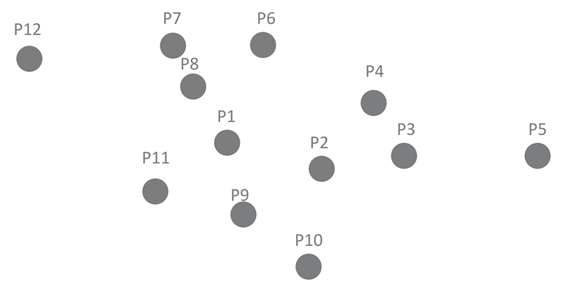


2. **p1** 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신p1, p2, p6, p7, p8, p9, p11)로 최소 데이터 5개 이상을 만족하므로 p1은 **`핵심 포인트`** 이다
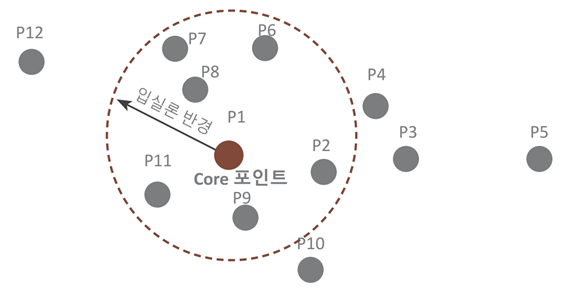


3. **p2** 데이터 포인트는 반경 내에 6개 데이터(p2, 이웃데이터 p1, p3, p4, p9, p10)를 가지고 있으므로 **`핵심 포인트`** 이다
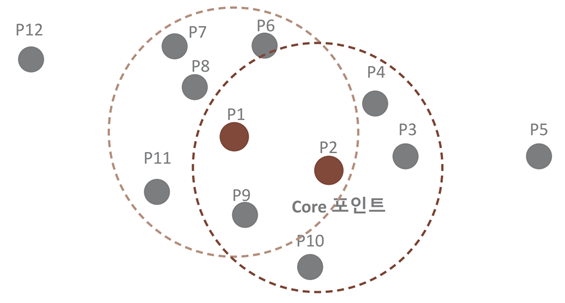


4. 핵심포인트 p1의 이웃 데이터 포인트 p2 역시 핵심포인트일 경우 p1에서 p2로 **연결해 직접 접근이 가능** 하다.
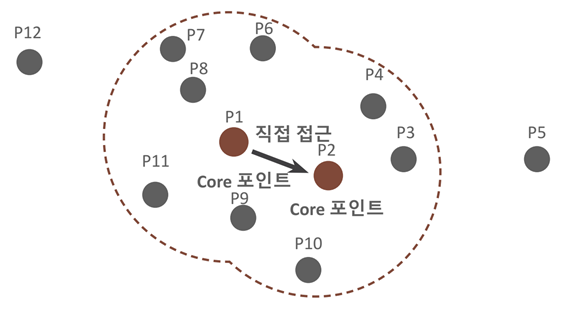


5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(cluster) 영역을 확장해 나간다(=> **`DBSCAN 군집화 방식`** )
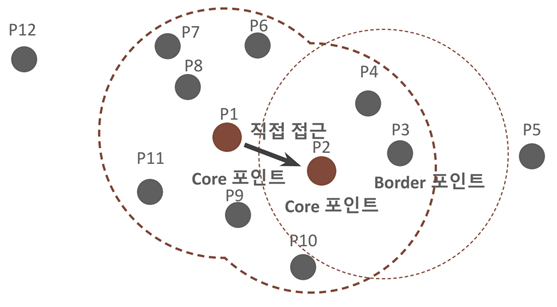


6. **p3** 데이터의 경우 반경 내에 포함되는 이웃 데이터는 p2, p4로 군집으로 분류할 수 있는 핵심 포인트가 되지 못한다. 그러나 이웃 데이터 중 핵심 포인트 p2를 가지고 있으므로 **`경계 포인트`** 가 되며 군집의 외곽을 형성한다.
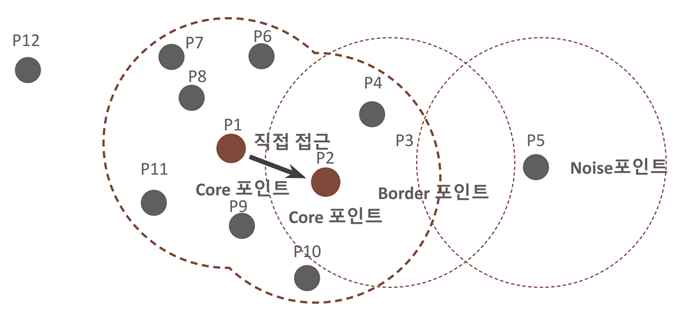



7. **p5**와 같이 반경 내에 최소 데이터를 가지고 있지 않고 핵심 포인트를 이웃 포인트로 가지고 있지 않는 데이터는 **`잡음 포인터`** 이다. 

### 사이킷런에서 DBSCAN 클래스 `DBSCAN`

DBSCAN 초기화 파라미터
- eps : 입실론 주변 영역의 반경
- min_samples : 핵심포인트가 되기 위한 입실론 주변 영역 내에 포함될 데이터의 최소 개수(자신의 데이터 포함)

### DBSCAN 적용하기 – 붓꽃 데이터 셋

In [2]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 
### 클러스터링 결과를 시각화하는 함수

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [6]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data = iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [4]:
from sklearn.datasets import load_iris

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN(eps=0.6, min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels

In [9]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


**PCA를 적용하여 2차원 데이터 세트로 변환 후 DBSCAN 군집화 결과 시각화**

In [10]:
iris_df.groupby(['target','dbscan_cluster'])['sepal_length'].count()

target  dbscan_cluster
0       -1                 1
         0                49
1       -1                 4
         1                46
2       -1                 8
         1                42
Name: sepal_length, dtype: int64

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
iris_pca = pca.fit_transform(iris.data)
iris_df['ftr1'] = iris_pca[:,0]
iris_df['ftr2'] = iris_pca[:,1]

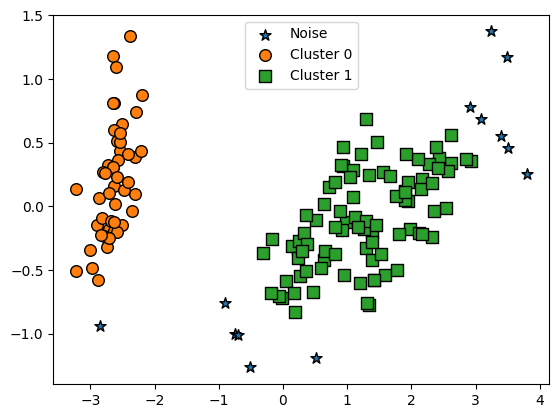

In [15]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

In [19]:
dbscan = DBSCAN(eps=0.8, min_samples=8,metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster_0.8'] = dbscan_labels
iris_df.groupby(['target'])['dbscan_cluster_0.8'].value_counts()

target  dbscan_cluster_0.8
0        0                    50
1        1                    50
2        1                    47
        -1                     3
Name: count, dtype: int64

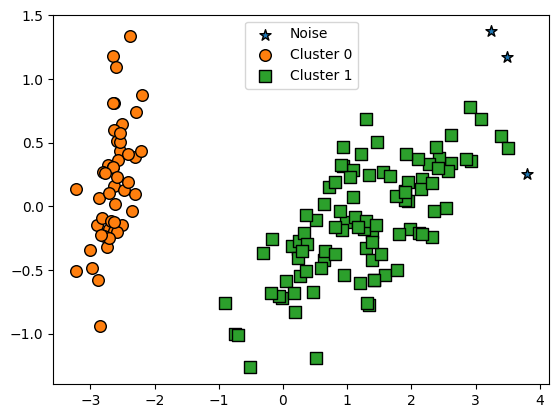

In [20]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster_0.8', iscenter=False)

In [23]:
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## dbscan_eps:0.5 samples:8


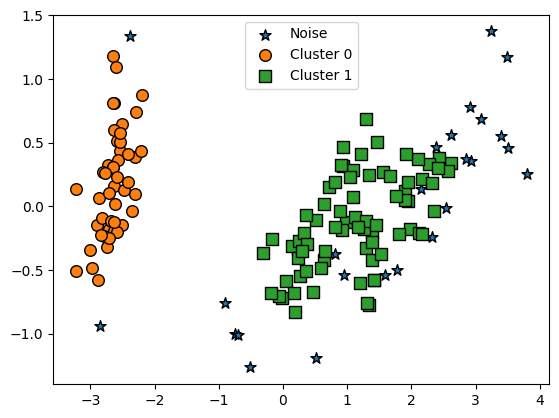

## dbscan_eps:0.5 samples:10


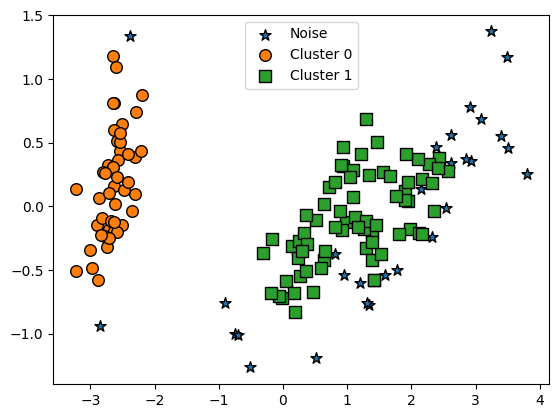

## dbscan_eps:0.5 samples:16


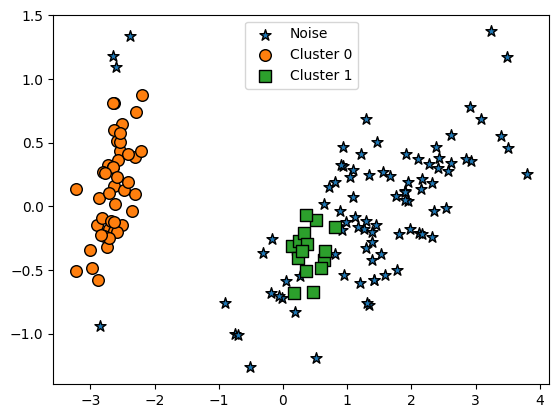

## dbscan_eps:0.6 samples:8


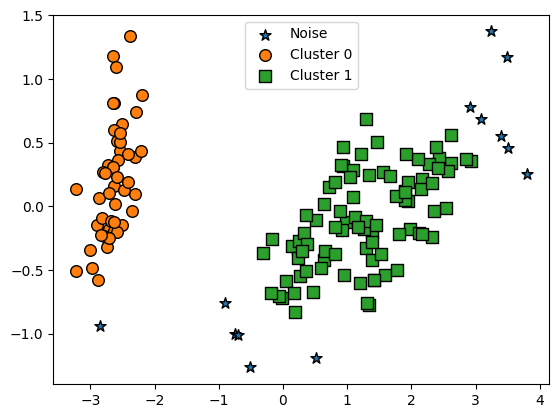

## dbscan_eps:0.6 samples:10


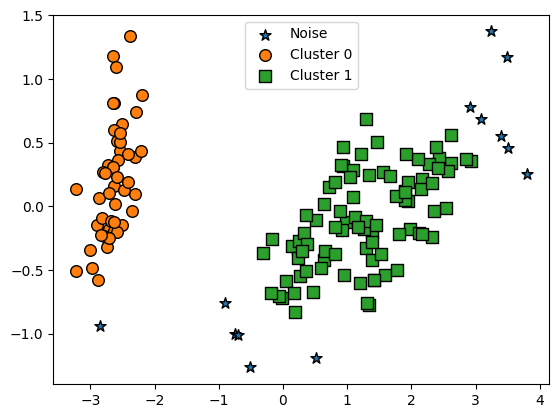

## dbscan_eps:0.6 samples:16


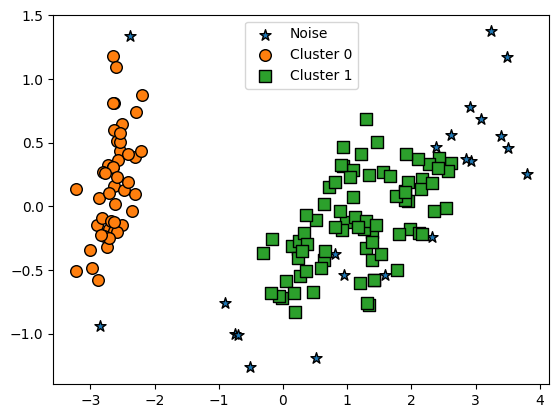

## dbscan_eps:0.7 samples:8


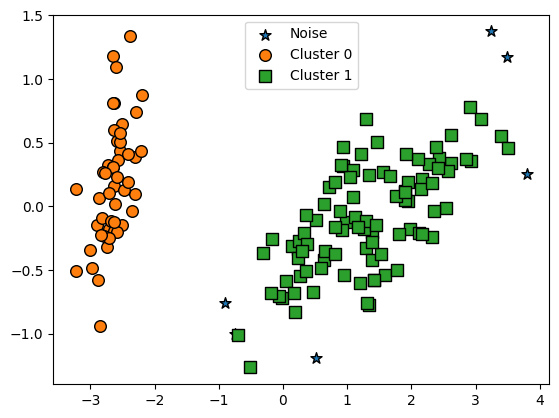

## dbscan_eps:0.7 samples:10


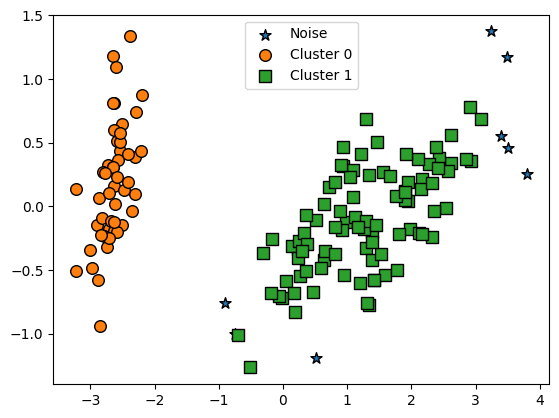

## dbscan_eps:0.7 samples:16


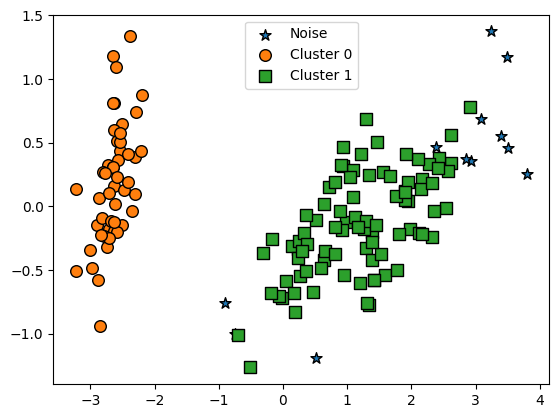

## dbscan_eps:0.7999999999999999 samples:8


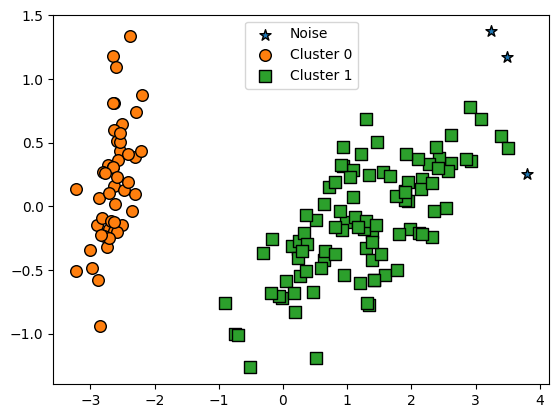

## dbscan_eps:0.7999999999999999 samples:10


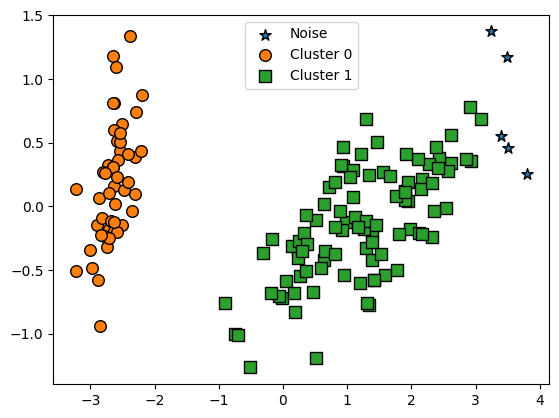

## dbscan_eps:0.7999999999999999 samples:16


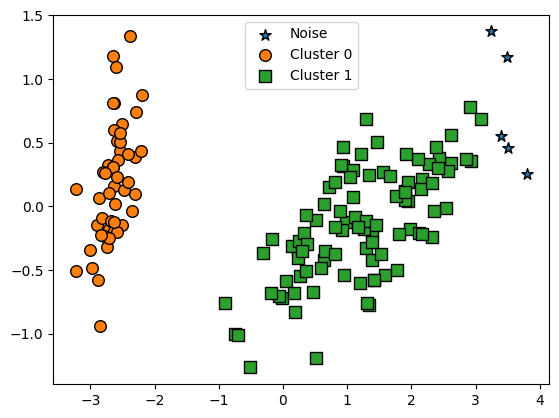

In [33]:
eps_ = np.arange(0.5,0.9,0.1)
min_samples_ = [8,10, 16]

for eps in eps_:
    for ms in min_samples_:
        dbscan = DBSCAN(eps=eps, min_samples=ms, metric='euclidean')
        dbscan_labels = dbscan.fit_predict(iris.data)
        colname = f'dbscan_eps:{eps} samples:{ms}'
        iris_df[colname] = dbscan_labels
        print(f'## {colname}')
        iris_df.groupby(['target'])[colname].value_counts()
        visualize_cluster_plot(dbscan, iris_df, colname, iscenter=False)

In [34]:
from sklearn.datasets import make_circles

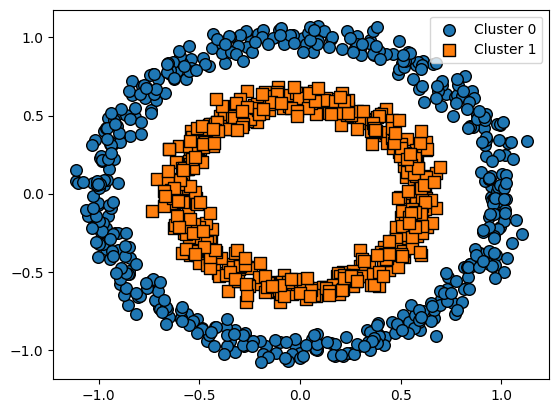

In [36]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.6)
circle_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
circle_df['target'] = y
visualize_cluster_plot(None, circle_df, 'target', iscenter=False)

### DBSCAN 적용하기 – make_circles() 데이터 세트

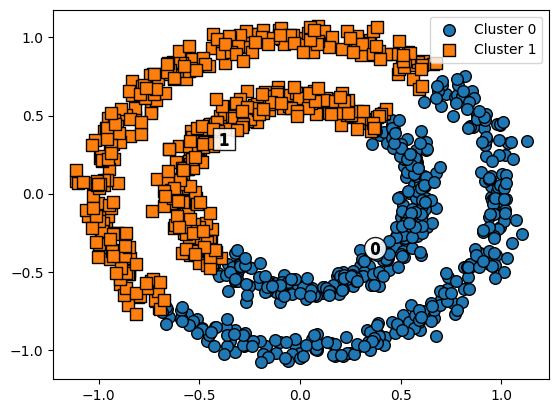

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
circle_df['kmeans'] = kmeans_labels
visualize_cluster_plot(kmeans, circle_df, 'kmeans', iscenter=True)

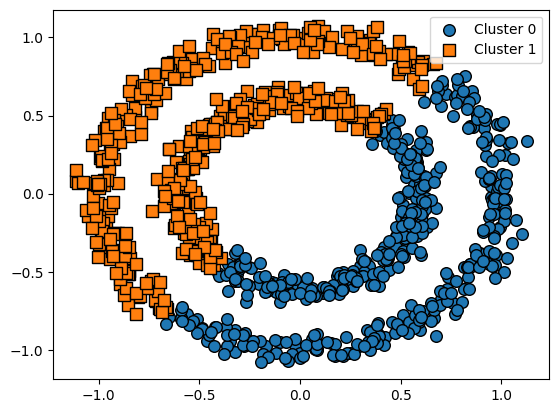

In [46]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)
circle_df['GMM'] = gmm_labels
visualize_cluster_plot(gmm, circle_df, 'GMM', iscenter=False)

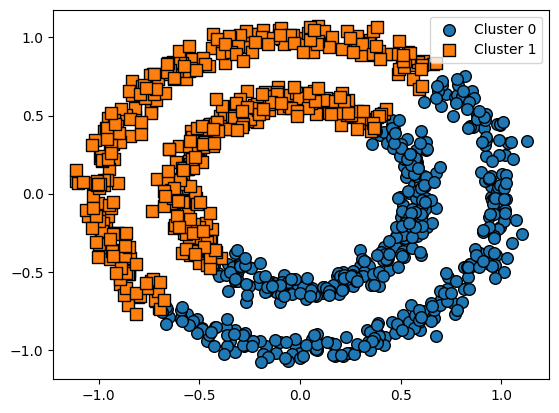

In [48]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
labels = dbscan.fit_predict(X)
circle_df['dbscan'] = labels
visualize_cluster_plot(dbscan, circle_df, 'kmeans', iscenter=False)

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_
    # else:
    #     if clusterobj.__class__.__name__ == 'GaussianMixture':
    #         centers = clusterobj.means_

    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    isNoise = False

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

-----